# Dataset de los vinos red

In [111]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

# Eda 

In [112]:
path = 'C:\\Users\\gvald\\Desktop\\examen_final_1\\datasets\\winequality-red.csv'
df = pd.read_csv(path, sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Para identificar que todas la datas pertenece a los vinos rojo se creara una comlumna 'came' que lo identifique  'red'

In [113]:
df['came'] = 'red'

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  came                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [115]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,came
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [116]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'came'],
      dtype='object')

No se observan anomalías evidentes en las estadísticas resumidas

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [118]:
df.duplicated().sum()

np.int64(240)

In [119]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

En la columna de quality nos falta la calidad 1,2 y 9  lo cual afecta la prediccion de esta clase  los vinos red

In [120]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,came
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,red


240 Datos duplicados , se encuentra que los datos son distintos y funcianal 

In [121]:
(df == '?').sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
came                    0
dtype: int64

# Graficos

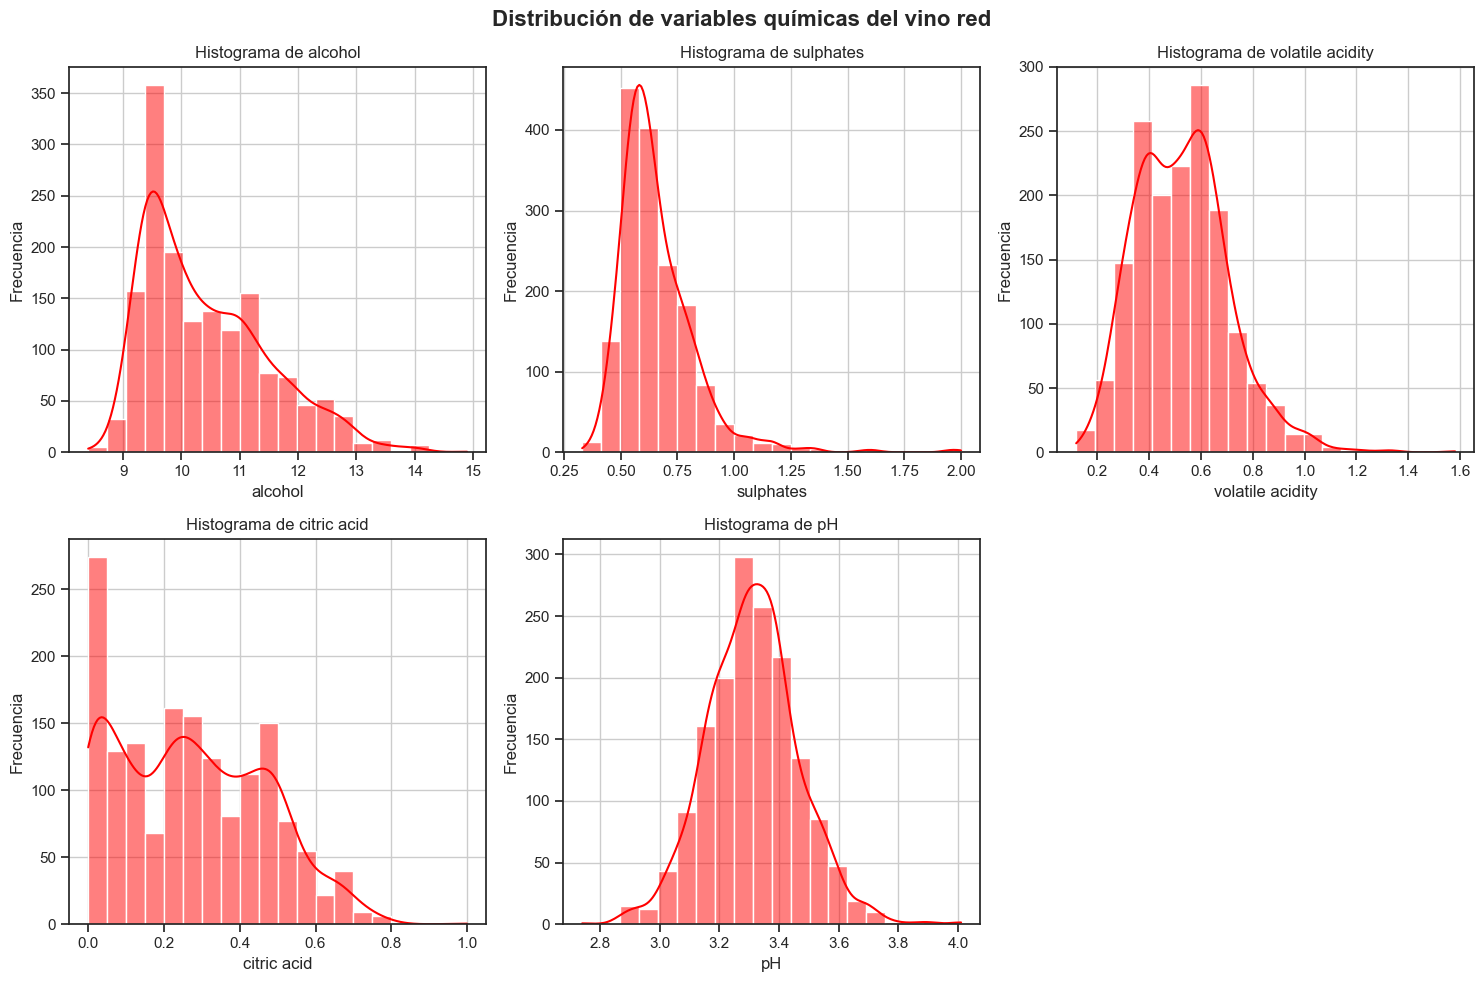

In [122]:
# Columnas clave a visualizar
plt.figure(figsize=(15, 10))
plt.suptitle('Distribución de variables químicas del vino red', fontsize=16, fontweight='bold')


plt.subplot(2, 3, 1)
sns.histplot(data=df, x='alcohol', kde=True, bins=20, color='red')
plt.title('Histograma de alcohol')
plt.xlabel('alcohol')
plt.grid(True)
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 2)
sns.histplot(data=df, x='sulphates', kde=True, bins=20, color='red')
plt.title('Histograma de sulphates')
plt.xlabel('sulphates')
plt.grid(True)
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 3)
sns.histplot(data=df, x='volatile acidity', kde=True, bins=20, color='red')
plt.title('Histograma de volatile acidity')
plt.xlabel('volatile acidity')
plt.grid(True)
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 4)
sns.histplot(data=df, x='citric acid', kde=True, bins=20, color='red')
plt.title('Histograma de citric acid')
plt.xlabel('citric acid')
plt.grid(True)
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 5)
sns.histplot(data=df, x='pH', kde=True, bins=20, color='red')
plt.title('Histograma de pH')
plt.xlabel('pH')
plt.grid(True)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Tomaremos algunas columnas para mostrar un histórico de muestra para identificar cual es el máximos de muestra con mayor frecuencia en los vinos red.
1. alcohol : mayor frecuencia fue entre 9~10
2. sulphates : mayor frecuencia fue entre 0.50~0.75
3. volatile acidity : mayor frecuencia fue 0.6
4. citric acid  : mayor frecuencia fue  0.0
5. pH  : mayor frecuencia fue entre 3.2~3.4


C:\Users\gvald\AppData\Local\Temp\ipykernel_42632\1166255281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='alcohol', palette='Set2')


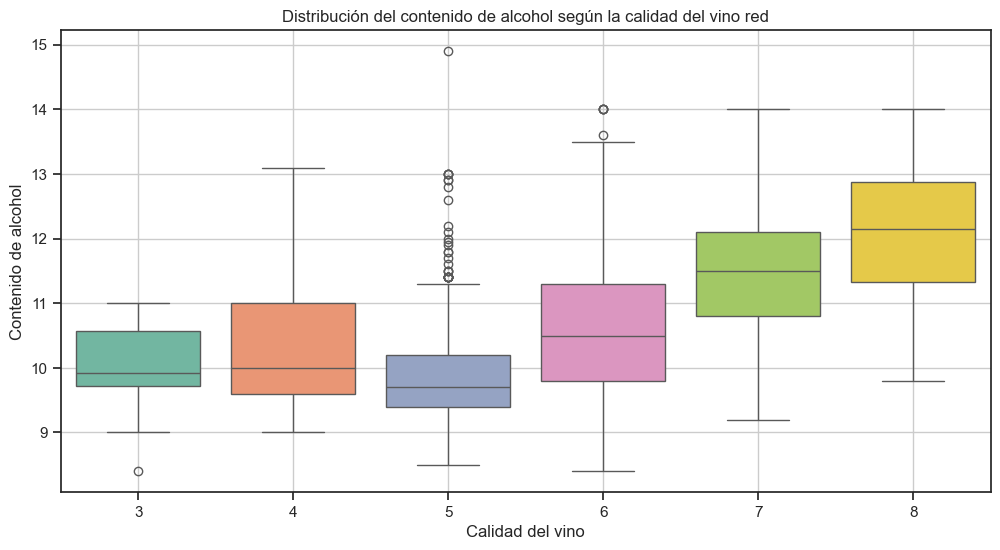

In [123]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quality', y='alcohol', palette='Set2')
plt.title('Distribución del contenido de alcohol según la calidad del vino red')
plt.xlabel('Calidad del vino')
plt.grid(True)
plt.ylabel('Contenido de alcohol')
plt.show()

En este gráfico boxplot se visualiza la relación entre la calidad del vino y el contenido de alcohol. Se observa que, en general, los vinos con mayor calidad tienden a tener un mayor contenido de alcohol, lo cual podría indicar una correlación positiva entre estos dos factores.

-Se observa que en la calidad 5 tienede a estar por encima de lo esperado

# Gráfico de correlación

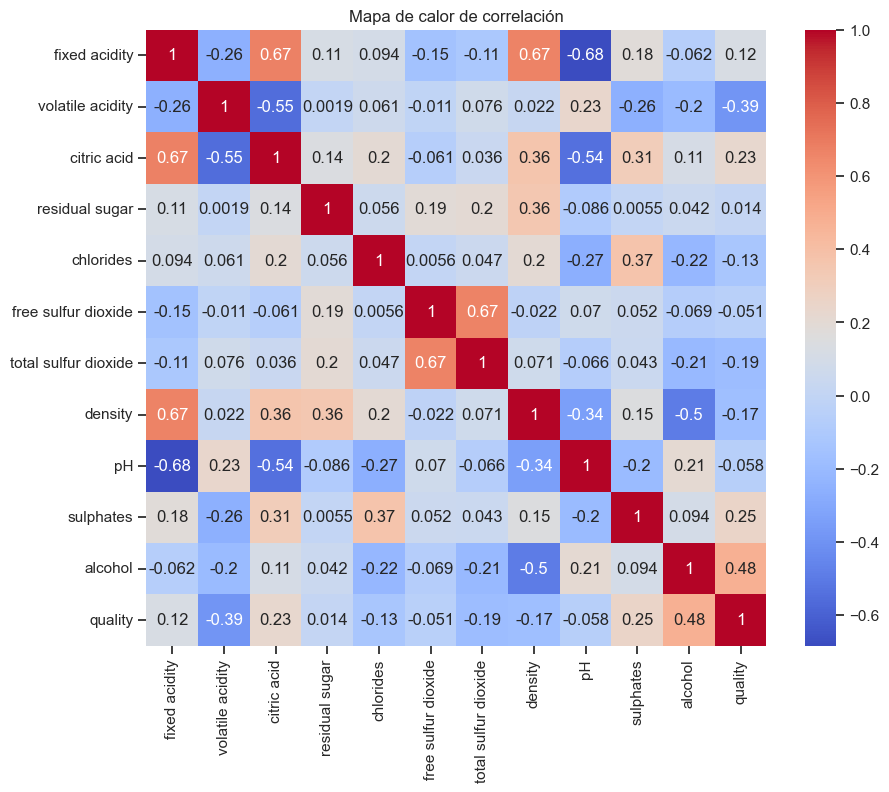

In [124]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

El grafico de correlacion nos muestra que los datos tienen correlacion nos ayuda a saber que columnas sirven mas en el modelo.

# Conclusion de eda vinos red

* Para identificar que todas la datas pertenece a los vinos rojo se creara una comlumna 'came' que lo identifique  'red' 
* No se observan anomalías evidentes en las estadísticas resumidas
En la columna de quality nos falta la calidad 1,2 y 9  lo cual afecta la prediccion de esta clase  los vinos red
* 240 Datos duplicados , se encuentra que los datos son distintos y funcianal al dato de vino
* Tomaremos algunas columnas para mostrar un histórico de muestra para identificar cual es el máximos de muestra con mayor frecuencia en los vinos red.
1. alcohol : mayor frecuencia fue entre 9~10
2. sulphates : mayor frecuencia fue entre 0.50~0.75
3. volatile acidity : mayor frecuencia fue 0.6
4. citric acid  : mayor frecuencia fue  0.0
5. pH  : mayor frecuencia fue entre 3.2~3.4
* En este gráfico boxplot se visualiza la relación entre la calidad del vino y el contenido de alcohol. Se observa que, en general, los vinos red con mayor calidad tienden a tener un mayor contenido de alcohol, lo cual podría indicar una correlación positiva entre estos dos factores.
1. Se observa que en la calidad 5 tienede a estar por encima de lo esperado

In [125]:
path_expor = 'C:\\Users\\gvald\\Desktop\\examen_final_1\\selected_dataset\\dataset_red_clean.csv'
df.to_csv(path_expor)